In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Amazon.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,7/14/2017 21:36:15,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,NaN,160000,...,0,0,0,0,0,0,0,0,NaN,NaN
2,7/16/2017 16:50:46,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,NaN,150000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,7/31/2017 15:54:17,Amazon,L6,Software Engineer,300000,"Seattle, WA",12.0,12.0,NaN,158000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,7/31/2017 15:55:01,Amazon,L7,Software Engineer,430000,"Seattle, WA",12.0,12.0,NaN,220000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                     0
company                       0
level                         0
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                         182
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                     2640
otherdetails               3269
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       5525
Education                  4524
dtype: int64


# Data Processing

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)
df['gender'].replace(np.nan, 'Unknown', inplace=True)
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0,0,Unknown,NaN,NaN
1,2017-07-14 21:36:15,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,NaN,160000.0,0,0,Unknown,NaN,NaN
2,2017-07-16 16:50:46,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,NaN,150000.0,7000,61000,Unknown,NaN,NaN
3,2017-07-31 15:54:17,Amazon,L6,Software Engineer,300000,"Seattle, WA",12.0,12.0,NaN,158000.0,142000,0,Unknown,NaN,NaN
4,2017-07-31 15:55:01,Amazon,L7,Software Engineer,430000,"Seattle, WA",12.0,12.0,NaN,220000.0,210000,0,Unknown,NaN,NaN


In [4]:
undesired_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df = df[df['title'].apply(lambda x: x not in undesired_titles)]
# df = df.drop(['tag'], axis=1)
df = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0,0,Unknown,Unknown,Unknown
1,2017-07-14 21:36:15,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,NaN,160000.0,0,0,Unknown,Unknown,Unknown
2,2017-07-16 16:50:46,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,NaN,150000.0,7000,61000,Unknown,Unknown,Unknown
3,2017-07-31 15:54:17,Amazon,L6,Software Engineer,300000,"Seattle, WA",12.0,12.0,NaN,158000.0,142000,0,Unknown,Unknown,Unknown
4,2017-07-31 15:55:01,Amazon,L7,Software Engineer,430000,"Seattle, WA",12.0,12.0,NaN,220000.0,210000,0,Unknown,Unknown,Unknown


# Correlation

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [6]:
df_model = df[['title','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus','totalyearlycompensation']]
df_model.head()

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,Product Manager,8.0,0.0,155000.0,0,0,310000
1,Software Engineering Manager,12.0,1.0,160000.0,0,0,287000
2,Software Engineer,10.0,0.0,150000.0,7000,61000,218000
3,Software Engineer,12.0,12.0,158000.0,142000,0,300000
4,Software Engineer,12.0,12.0,220000.0,210000,0,430000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2494/949237972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['title'] = le.fit_transform(df_model['title'])


In [8]:
df_model['title'].value_counts()

6    5023
5     899
7     692
8     345
9     267
1     265
4     154
0     122
2      98
3      18
Name: title, dtype: int64

In [9]:
df['title'].value_counts()

Software Engineer               5023
Product Manager                  899
Software Engineering Manager     692
Solution Architect               345
Technical Program Manager        267
Data Scientist                   265
Product Designer                 154
Business Analyst                 122
Hardware Engineer                 98
Management Consultant             18
Name: title, dtype: int64

In [10]:
corr_matrix = df_model.corr()

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

df_model.drop(to_drop, axis=1, inplace=True)

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2494/3134125425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop(to_drop, axis=1, inplace=True)


In [11]:
df_model.head(5)

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,5,8.0,0.0,155000.0,0,0,310000
1,7,12.0,1.0,160000.0,0,0,287000
2,6,10.0,0.0,150000.0,7000,61000,218000
3,6,12.0,12.0,158000.0,142000,0,300000
4,6,12.0,12.0,220000.0,210000,0,430000


# Outlier

In [12]:
z = np.abs((df_model - df_model.mean()) / df_model.std())
outliers = z > 3
df_model = df_model[~outliers.any(axis=1)]

In [13]:
x = df_model.drop(['totalyearlycompensation'] , axis = 1).values
y = df_model['totalyearlycompensation'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear Rgression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(x_train , y_train)
lr.score(x_train , y_train)

0.8203797830671785

In [16]:
lr.score(x_test , y_test)

0.8133198427408004

In [17]:
y_pred = lr.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,87000,99030.284430
1,220000,253723.643196
2,156000,163600.945254
3,225000,237208.764607
4,294000,284751.297720
5,66000,81853.712736
6,390000,362799.065573
7,280000,300252.373691
8,152000,157698.536548
9,350000,323678.378804


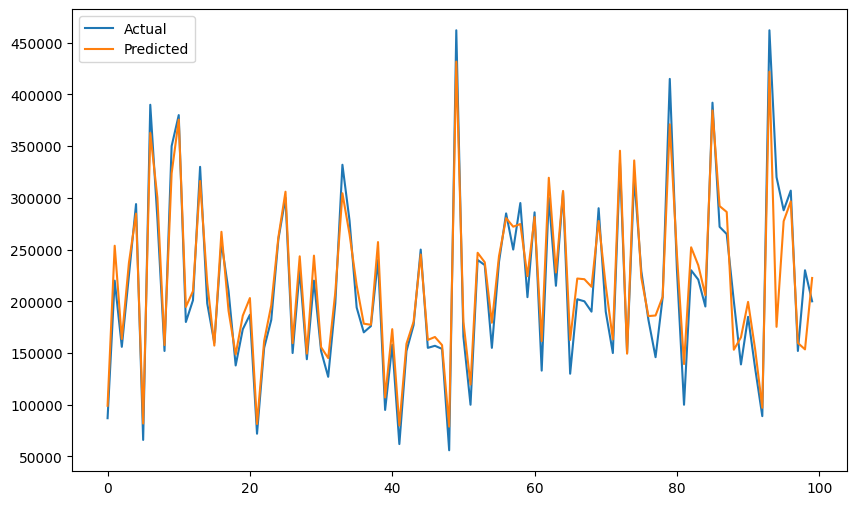

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:100])
plt.legend(['Actual' , 'Predicted'])

In [19]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1157057782.946104

In [20]:
rsq = r2_score(y_test,y_pred)
rsq

0.8133198427408004

In [21]:
df_2 = df_1.sort_values(by = ['Y_pred'], ascending = False)
df_2.head(5)

,Y_test,Y_pred
591,240000,464892.090693
1532,485000,462725.722499
1831,500000,451865.215495
1388,500000,451240.727986
1905,490000,447466.751341


# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_train , y_train)

0.9318659514060883

In [23]:
knn.score(x_test , y_test)

0.8899130188934433

In [24]:
y_pred = knn.predict(x_test)
df_3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_3.head(10)

,Y_test,Y_pred
0,87000,68400.0
1,220000,232600.0
2,156000,158600.0
3,225000,237600.0
4,294000,288200.0
5,66000,60200.0
6,390000,393000.0
7,280000,289800.0
8,152000,154000.0
9,350000,341000.0


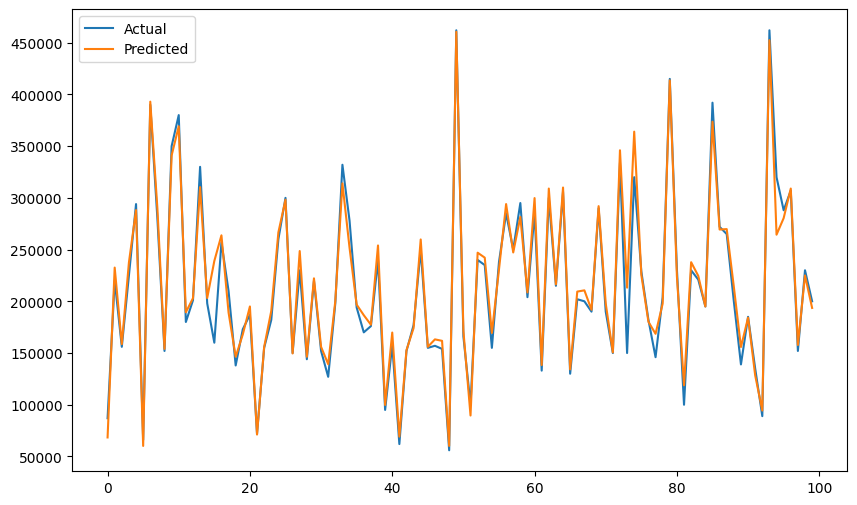

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_3[:100])
plt.legend(['Actual' , 'Predicted'])

In [26]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

682327464.0460211

In [27]:
rsq = r2_score(y_test,y_pred)
rsq

0.8899130188934433

In [28]:
df_4 = df_3.sort_values(by = ['Y_pred'], ascending = False)
df_4.head(5)

,Y_test,Y_pred
1388,500000,481400.0
1230,490000,477000.0
1532,485000,476200.0
1831,500000,467800.0
162,437000,461200.0


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2, max_depth=4)
rf.fit(x_train , y_train) 
rf.score(x_train , y_train)

0.11736896197327852

In [30]:
rf.score(x_test , y_test)

0.08820709491850431

In [31]:
y_pred = rf.predict(x_test)
df_5 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_5.head(10)

,Y_test,Y_pred
0,87000,150000
1,220000,220000
2,156000,150000
3,225000,250000
4,294000,240000
5,66000,150000
6,390000,350000
7,280000,300000
8,152000,150000
9,350000,340000


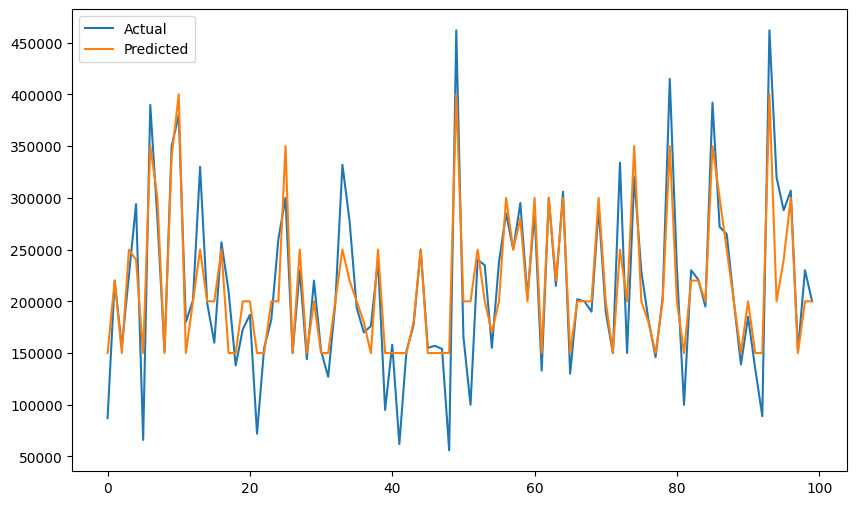

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df_5[:100])
plt.legend(['Actual' , 'Predicted'])

In [33]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1697366251.198466

In [34]:
rsq = r2_score(y_test,y_pred)
rsq

0.7261462622088015

In [35]:
df_6 = df_5.sort_values(by = ['Y_pred'], ascending = False)
df_6.head(5)

,Y_test,Y_pred
418,480000,480000
101,415000,400000
1532,485000,400000
1677,400000,400000
602,428000,400000


# Neural Net

In [36]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8231779141238952

In [37]:
mlp.score(x_test , y_test)

0.8177736202545715

In [38]:
y_pred = rf.predict(x_test)
df_7 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_7.head(10)

,Y_test,Y_pred
0,87000,150000
1,220000,220000
2,156000,150000
3,225000,250000
4,294000,240000
5,66000,150000
6,390000,350000
7,280000,300000
8,152000,150000
9,350000,340000


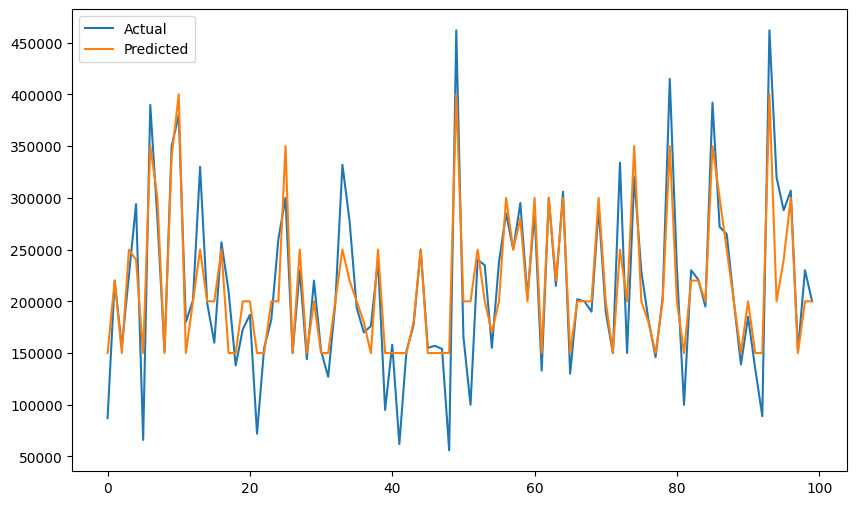

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_7[:100])
plt.legend(['Actual' , 'Predicted'])

In [40]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1697366251.198466

In [41]:
rsq = r2_score(y_test,y_pred)
rsq

0.7261462622088015

In [42]:
df_8 = df_7.sort_values(by = ['Y_pred'], ascending = False)
df_8.head(5)

,Y_test,Y_pred
418,480000,480000
101,415000,400000
1532,485000,400000
1677,400000,400000
602,428000,400000


# SVM

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
svm.score(x_train, y_train)

0.0802240746123215

In [44]:
svm.score(x_test , y_test)

0.0951826996802213

In [45]:
y_pred = svm.predict(x_test)
df_9 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_9.head(10)

,Y_test,Y_pred
0,87000,198464.192588
1,220000,210471.980882
2,156000,202336.122113
3,225000,208185.136590
4,294000,210069.385222
5,66000,197837.773430
6,390000,215977.609592
7,280000,213055.117941
8,152000,202158.618543
9,350000,213004.303491


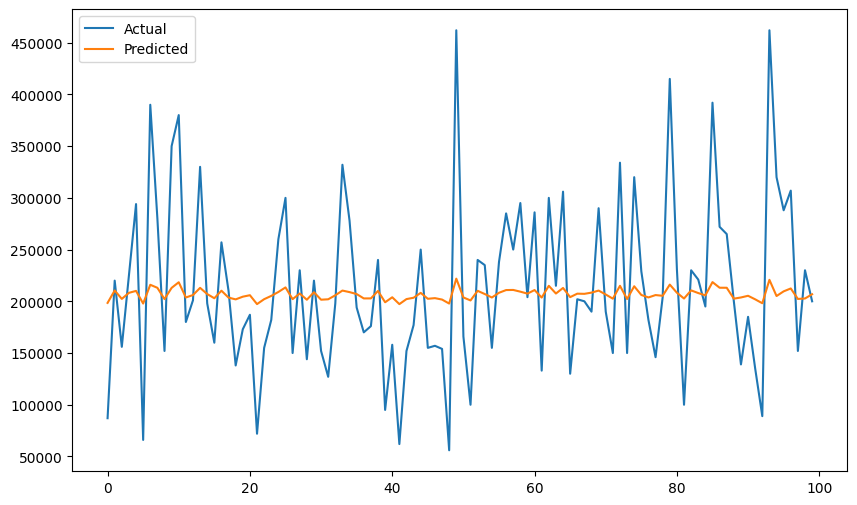

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df_9[:100])
plt.legend(['Actual' , 'Predicted'])

In [47]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

5608126299.281278

In [48]:
rsq = r2_score(y_test,y_pred)
rsq

0.0951826996802213

In [49]:
df_10 = df_9.sort_values(by = ['Y_pred'], ascending = False)
df_10.head(5)

,Y_test,Y_pred
1532,485000,223707.713078
1388,500000,222363.488357
1062,467000,222324.706959
213,476000,222274.854676
1230,490000,222212.619958


# Gain Chart

In [50]:
y_test_methods = [df_2['Y_test'], df_4['Y_test'], df_6['Y_test'], df_8['Y_test']]
y_pred_methods = [df_2['Y_pred'], df_4['Y_pred'], df_6['Y_pred'], df_8['Y_pred']]

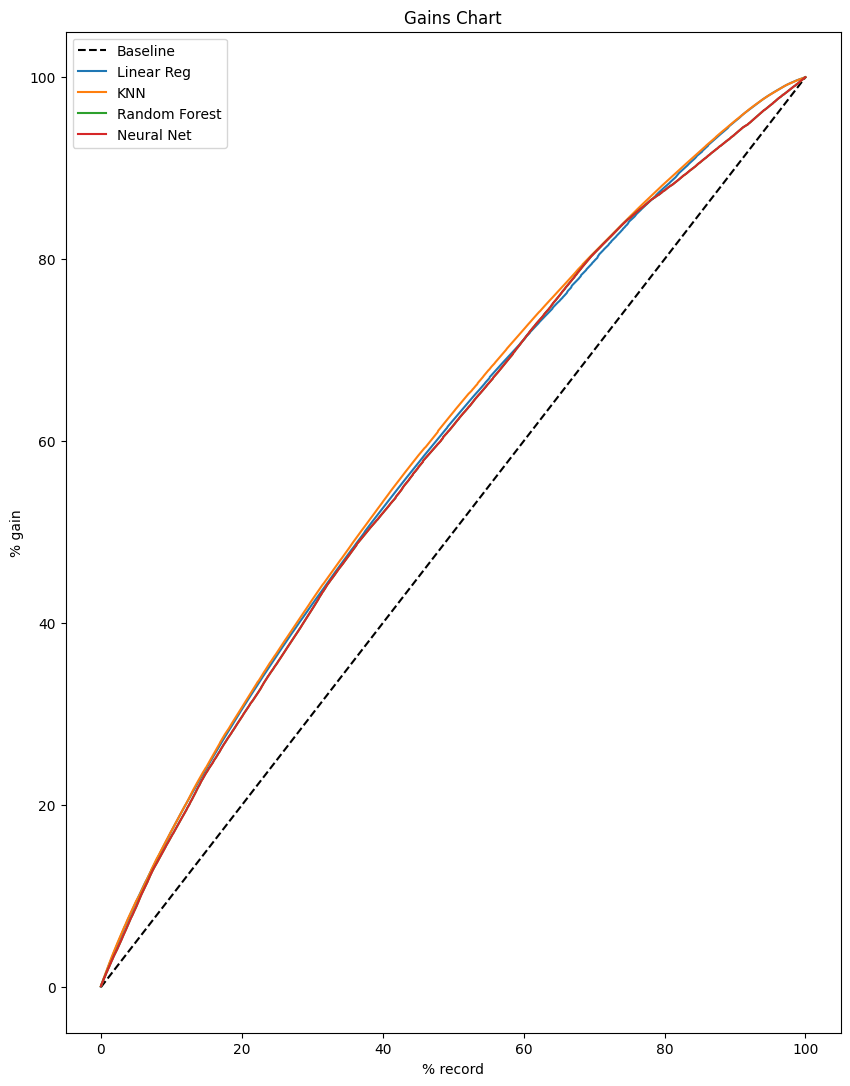

In [51]:
def cumulative_gain(y_test, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    sorted_labels = y_test.iloc[sorted_indices]
    cumulative_gains = np.cumsum(sorted_labels) / np.sum(sorted_labels)
    return cumulative_gains

# calculate the cumulative gain for each method
gains = []
for i in range(len(y_test_methods)):
    gains.append(cumulative_gain(y_test_methods[i], y_pred_methods[i]))

# plot the cumulative gain chart
plt.figure(figsize=(10, 13))
plt.plot(np.linspace(0, 100, len(y_test_methods[0])), np.linspace(0, 100, len(y_test_methods[0])), 'k--', label='Baseline')
for i in range(len(gains)):
    plt.plot(np.linspace(0, 100, len(y_test_methods[0])), gains[i]*100, label=f'{["Linear Reg", "KNN", "Random Forest", "Neural Net"][i]}')
plt.xlabel('% record')
plt.ylabel('% gain')
plt.title('Gains Chart')
plt.legend()
plt.show()